In [1]:
from gensim.models import Word2Vec
sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'machine', 'learning', 'book'],
            ['one', 'more', 'new', 'book'],
         
          ['this', 'is', 'about', 'machine', 'learning', 'post'],
          ['orange', 'juice', 'is', 'the', 'liquid', 'extract', 'of', 'fruit'],
          ['orange', 'juice', 'comes', 'in', 'several', 'different', 'varieties'],
          ['this', 'is', 'the', 'last', 'machine', 'learning', 'book'],
          ['orange', 'juice', 'comes', 'in', 'several', 'different', 'packages'],
          ['orange', 'juice', 'is', 'liquid', 'extract', 'from', 'fruit', 'on', 'orange', 'tree']]


In [2]:
from gensim.models import FastText
model = Word2Vec(sentences, size=20, min_count=1, window=2,sg=0)
#model = FastText(sentences, size=20, min_count=1, window=2,sg=0)

In [3]:
model['is']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.02383346,  0.02474875, -0.01300415, -0.0089966 ,  0.02219755,
       -0.02417354,  0.00850279, -0.00671743,  0.0246528 ,  0.01460634,
        0.01089522,  0.00218082,  0.00833178,  0.02347117,  0.00914105,
       -0.01513829,  0.00820174, -0.02172375,  0.0171936 , -0.00381313],
      dtype=float32)

In [4]:
model.similarity('orange','juice')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.18763143

In [5]:
model.similarity('this','orange')
#model.similarity('machine','orange')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


-0.1397483

In [6]:
model.most_similar('orange')[:5]
#model.most_similar('machine')[:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('new', 0.6496204733848572),
 ('last', 0.38098153471946716),
 ('packages', 0.24418778717517853),
 ('varieties', 0.24272023141384125),
 ('machine', 0.19528192281723022)]

In [7]:
model['machine']
#Out of vocabulary word: OOV

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.01264168,  0.01202394, -0.00189259, -0.00776784, -0.00631003,
       -0.01772993,  0.01228266,  0.0018453 ,  0.00991495, -0.00014828,
       -0.02282144,  0.02171185, -0.00249518, -0.00225182, -0.00761795,
       -0.00244339, -0.01499067,  0.02155475, -0.0167224 , -0.01058203],
      dtype=float32)

In [8]:
close_words = model.similar_by_word('orange')
close_words

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('new', 0.6496204733848572),
 ('last', 0.38098153471946716),
 ('packages', 0.24418778717517853),
 ('varieties', 0.24272023141384125),
 ('machine', 0.19528192281723022),
 ('about', 0.1862090528011322),
 ('different', 0.17032912373542786),
 ('tree', 0.16500543057918549),
 ('fruit', 0.14930640161037445),
 ('learning', 0.13356956839561462)]

In [9]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
      wrd_vector = model[wrd_score[0]]
      word_labels.append(wrd_score[0])
      arr = np.append(arr, np.array([wrd_vector]), axis=0)
      
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()


    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


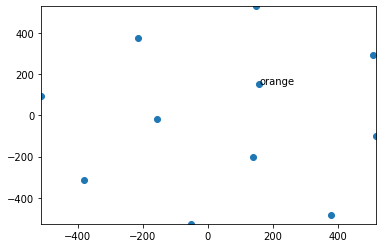

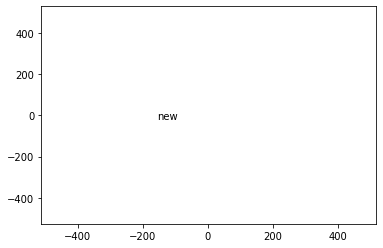

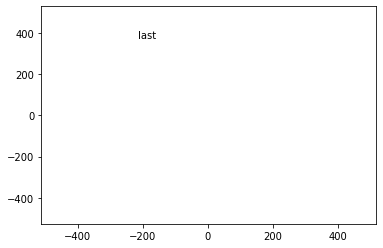

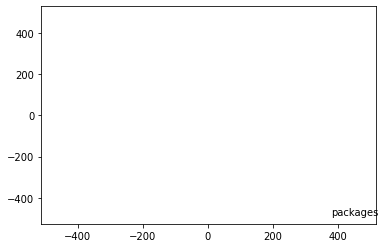

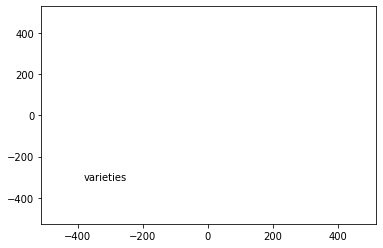

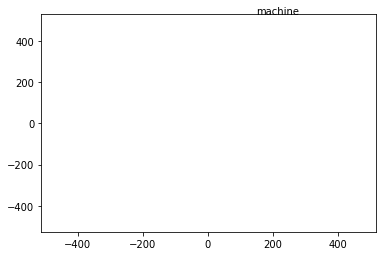

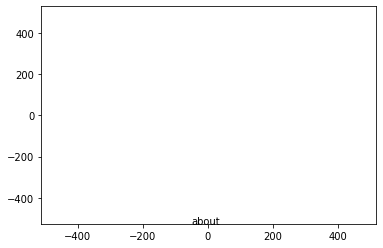

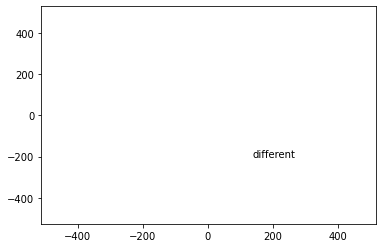

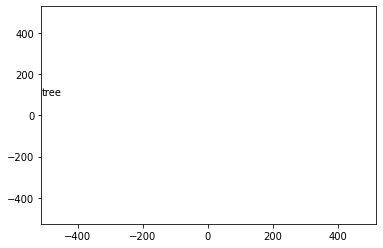

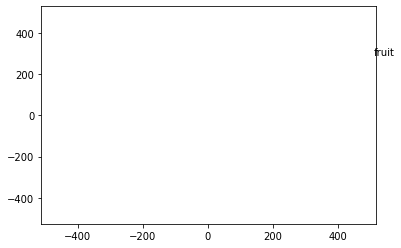

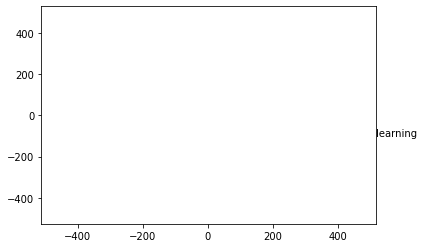

In [10]:
display_closestwords_tsnescatterplot(model, 'orange',20) 

In [11]:
import numpy as np
 
def sent_vectorizer(sent, model):
    sent_vec = np.zeros(20)
    numw = 0
    for w in sent:
        try:
            sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
    return sent_vec / np.sqrt(sent_vec.dot(sent_vec))
 
V=[]
for sentence in sentences:
    V.append(sent_vectorizer(sentence, model))
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [12]:
V[0]

array([ 0.21043966,  0.13089872, -0.24404141, -0.29148068,  0.10462396,
       -0.11194665, -0.06609174, -0.3075311 ,  0.14784601,  0.3246151 ,
       -0.37288162, -0.09830584,  0.23551459,  0.18071724,  0.21297844,
        0.06598466, -0.3393531 ,  0.25442752,  0.24498114, -0.13399375])

In [13]:
V

[array([ 0.21043966,  0.13089872, -0.24404141, -0.29148068,  0.10462396,
        -0.11194665, -0.06609174, -0.3075311 ,  0.14784601,  0.3246151 ,
        -0.37288162, -0.09830584,  0.23551459,  0.18071724,  0.21297844,
         0.06598466, -0.3393531 ,  0.25442752,  0.24498114, -0.13399375]),
 array([-0.01293359,  0.3117044 , -0.06622822, -0.31670307,  0.06600229,
        -0.36204373,  0.06723398, -0.31491292,  0.15158175,  0.28489825,
        -0.15677202,  0.07822803,  0.02325239,  0.101218  ,  0.4591575 ,
         0.21021025, -0.2474835 ,  0.01633572,  0.13560522, -0.27985532]),
 array([ 0.12580881, -0.21392188,  0.10828961, -0.2393381 , -0.02247976,
        -0.09854798,  0.00811149,  0.11350138, -0.13085614,  0.38749149,
        -0.3601779 ,  0.26069669,  0.12533095,  0.30917463,  0.28493171,
        -0.11654361, -0.27332979, -0.01744954,  0.27933714,  0.34951787]),
 array([ 0.08048764,  0.31436387, -0.03628356, -0.04014116,  0.28719588,
        -0.46071611,  0.06984063, -0.28926569